## 1- Introduction

- Name : Khalisul Akbar
- Batch : FTDS-010

### Objective :

The objectives from this project are :

1. To do an anlysis for BTCUSD using price analysis, volume analysis, and technical analysis using EDA for the historical BTCUSDT price data from 2017 to 2022.

2. Build a predictive model to forecast the next day price for BTCUSDT.

3. To combine the human-side analysis with machine learning analysis to determine the market direction and forecast the direction of the market.


## 2- Import Library

In [1]:
# For dataset manipulation
import pandas as pd
import numpy as np

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For charting and data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import datetime

# For modelling
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import metrics
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Others
import warnings
warnings.filterwarnings('ignore')


## 3- Data loading

In [2]:
df = pd.read_csv('Binance_BTCUSDT_d.csv')
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.657066e+12,2022-07-06 00:00:00,BTC/USDT,20175.84,20265.28,20174.46,20213.78,809.73146,1.637333e+07,12394.0
1,1.656979e+12,2022-07-05 00:00:00,BTC/USDT,20236.71,20750.00,19304.40,20175.83,96041.13756,1.919950e+09,1612273.0
2,1.656893e+12,2022-07-04 00:00:00,BTC/USDT,19315.83,20354.01,19055.31,20236.71,74814.04601,1.470988e+09,1282843.0
3,1.656806e+12,2022-07-03 00:00:00,BTC/USDT,19252.82,19647.63,18781.00,19315.83,51087.46631,9.802559e+08,880786.0
4,1.656720e+12,2022-07-02 00:00:00,BTC/USDT,19279.80,19467.39,18977.01,19252.81,46180.30210,8.884155e+08,833508.0
...,...,...,...,...,...,...,...,...,...,...
1781,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12000,2.770592e+06,NaN
1782,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54000,1.915636e+06,NaN
1783,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15000,1.508239e+06,NaN
1784,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07000,4.994494e+06,NaN


In [3]:
# Duplicate the dataset

df_ori = df.copy()

In [4]:
# dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1786 non-null   float64
 1   date         1786 non-null   object 
 2   symbol       1786 non-null   object 
 3   open         1786 non-null   float64
 4   high         1786 non-null   float64
 5   low          1786 non-null   float64
 6   close        1786 non-null   float64
 7   Volume BTC   1786 non-null   float64
 8   Volume USDT  1786 non-null   float64
 9   tradecount   1662 non-null   float64
dtypes: float64(8), object(2)
memory usage: 139.7+ KB


The BTC historical dataset we have consists of 1786 rows and 10 columns. It seems that historical data we have is from **2017-08-17** to **2022-07-06** (`around 5 years of data`) . From the info above we can se that we have two datetime column which are unix and date but the Dtype for both columns is not Datetime yet so we should change that. Furthermore, we only need one datetime column so i decided to keep date column and will discard the unix.

In [5]:
# drop unix column

df = df.drop(columns='unix', axis=1)

# convert column to datetime

df['date'] = pd.to_datetime(df['date'])

# set date as index 

df = df.set_index('date').sort_index(ascending=True)

From a glance we can see that there are some missing values in tradecount column, as shown below :

In [6]:
# check missing values

df.isnull().sum()

symbol           0
open             0
high             0
low              0
close            0
Volume BTC       0
Volume USDT      0
tradecount     124
dtype: int64

In [7]:
# Dataset statistics

df.describe()

,open,high,low,close,Volume BTC,Volume USDT,tradecount
count,1786.000000,1786.000000,1786.000000,1786.000000,1786.000000,1.786000e+03,1.662000e+03
mean,19397.398718,19956.802643,18749.457800,19406.275510,51161.277203,1.137374e+09,8.633639e+05
std,17529.056318,18011.918798,16966.029473,17525.607566,36645.469434,1.392096e+09,7.456103e+05
min,3189.020000,3276.500000,2817.000000,3189.020000,225.760000,9.677533e+05,1.239400e+04
25%,7028.387500,7275.590000,6787.750000,7037.415000,29008.537917,2.323097e+08,2.774082e+05
50%,9795.995000,10094.000000,9525.675000,9805.525000,43854.957734,4.801824e+08,6.124865e+05
75%,34260.882500,35474.500000,32796.500000,34258.777500,64822.186675,1.714296e+09,1.252174e+06
max,67525.820000,69000.000000,66222.400000,67525.830000,402201.673764,1.347769e+10,6.331062e+06


## 4- Exploratory Data Analysis (EDA)

### 1. BTCUSDT 5 years Close Price Analysis

Plotting the BTCUSDTC Line chart using close price historical data from 2017 to 2022 :

In [8]:
# Price BTC chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index,
                y=df['close'])) 
fig.update_traces(line_color='Cyan', line_width=1)   # Set color for line chart

# Add Cycle
fig.add_vrect(x0="2017-08-17", x1="2020-11-01", y0=1, y1=0,
              annotation_text="Accumulation/sideways", annotation_position="top left", annotation_font_color="white",
              fillcolor="yellow", opacity=0.25, line_width=0)

fig.add_vrect(x0="2020-11-5", x1="2021-11-09", 
              annotation_text="Uptrend", annotation_position="top left", annotation_font_color="white",
              fillcolor="green", opacity=0.25, line_width=0)

fig.add_vrect(x0="2021-11-12", x1="2022-07-06", 
              annotation_text="Downtrend", annotation_position="top left", annotation_font_color="white",
              fillcolor="red", opacity=0.25, line_width=0)

# Add line
fig.add_hline(y=20000, annotation_text='2018 ALL TIME HIGH', annotation_position="top left", annotation_font_color="gold", opacity=0)
fig.add_hline(y=67500, annotation_text='ALL TIME HIGH', annotation_position="bottom right", annotation_font_color="gold",opacity=0)
fig.add_hline(y=4000, line_dash="dash", line_color="white", opacity=0.5)
fig.add_hline(y=13000, line_dash="dash", line_color="white", opacity=0.5)

# Labels
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Price")
fig.update_yaxes(showline=False, linewidth=1, linecolor='black', gridcolor='black')

# Background
fig.update_layout(showlegend=False, legend_bgcolor='black')
fig.update_layout(paper_bgcolor='black',plot_bgcolor='black', font_color = 'white')
fig.update_layout(title_text='BTCUSDT Historical Price', title_x=0.5)
fig.update_layout(autosize=True)

# Drag mode
fig.update_layout(dragmode='pan')
fig.update_layout(template='plotly_dark')
fig.show()

From The Line Chart above we can see that, from the range of 2017 to 2022, there are three cycle of the BTCUSDT movement which are :

- accumulation/sideways 
- Uptrend
- Downtrend

##### 1. Accumulation/sideways (Ranging from 4000 - 13000)

At a glance, we can see that from july 2017 to jan 2021 the price moving sideways and ranging from around 4000 to 13000. However at the early of 2018, the BTC price reached 2018 ALL TIME HIGH at around 20000 before coming back to ranging price and stay at the sideways position for around 3.5 years.

In [9]:
# Accumulation plot

# Data
accum = df['2017-08-17' :'2020-11-01']

# Line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=accum.index,
                y=accum['close'])) 
fig.update_traces(line_color='Cyan', line_width=1)   # Set color for line chart

# Add color and line
fig.add_vrect(x0="2017-08-17", x1="2020-11-01", y0=1, y1=0,
              fillcolor="yellow", opacity=0.25, line_width=0)

fig.add_hline(y=20000, annotation_text='2018 ALL TIME HIGH', annotation_position="top left", annotation_font_color="gold", opacity=0)
fig.add_hline(y=8000, annotation_text='ACCUMULATION AREA', annotation_position="top left", annotation_font_color="white", opacity=0)
fig.add_hrect(y0=12000, y1=13000, line_width=0, fillcolor="red", opacity=0.5)
fig.add_hrect(y0=3000, y1=5000, line_width=0, fillcolor="green", opacity=0.5)

# Layout setting
fig.update_layout(title_text='Accumulation', title_x=0.5)
fig.update_layout(template='plotly_dark')
fig.update_layout(width=800, height=400)
fig.show()

##### 2. Uptrend Move (Creating higher high)

Early November 2020, BTC has succeded to move above the resistance price (around 13000) and began to change from sideways to uptrend. This Uptrend move last for around 1 year and the BTC price was able to move from around 13000 to 67500 (ALL TIME HIGH) or increasing 419% from the start of that month to November 2021.

In [10]:
# Uptrend plot

# Data
uptrend = df['2020-11-1' :'2021-11-13']

# Line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=uptrend.index,
                y=uptrend['close'])) 
fig.update_traces(line_color='Cyan', line_width=1)   # Set color for line chart

# Add color
fig.add_vrect(x0="2020-11-5", x1="2021-11-09", 
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_hline(y=72000, annotation_text='ALL TIME HIGH', annotation_position="bottom right", annotation_font_color="gold",opacity=0)

# Layout setting
fig.update_layout(title_text='Uptrend Move', title_x=0.5)
fig.update_layout(template='plotly_dark')
fig.update_layout(width=800, height=400)
fig.show()

##### 3. Downtrend Move (Creating lower low)

Toward the end of November 2021 to current date, The price began to move lower and lower decreasing from ALL TIME HIGH price at 67500 to around 20000 (currently) or losing value 70% since all time high.

In [11]:
# Downtrend plot

downtrend = df['2021-11-01' :'2022-07-10']

# Line chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=downtrend.index,
                y=downtrend['close'])) 
fig.update_traces(line_color='Cyan', line_width=1)   # Set color for line chart

# Add color
fig.add_vrect(x0="2021-11-12", x1="2022-07-06", 
              fillcolor="red", opacity=0.25, line_width=0)

# Layout setting
fig.update_layout(title_text='Downtrend Move', title_x=0.5)
fig.update_layout(template='plotly_dark')
fig.update_layout(width=800, height=400)
fig.show()

### 2. BTCUSDT Support and Resistance

What is support and resistance ?

```
According to investopedia, Support is a price level where a downtrend can be expected to pause due to a concentration of demand or buying interest. As the price of assets or securities drops, demand for the shares increases, thus forming the support line. Meanwhile, resistance zones arise due to selling interest when prices have increased.
```

How do we use support and resistance ?

```
Once we indentified the support and the resistance area, we will be able to know where the price will be possibly be stopped or halted its move. Hence, we can use that area as an entry and exit point. However, we have to be always trade and use those area carefully since once the price reaching support and resistance area, the price will do two things which are reverse its direction or continuing its initial direction.
```
source : https://www.investopedia.com/trading/support-and-resistance-basics/

            

Plotting Support and Resistance area for BTCUSD :

In [12]:
# Price BTC chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index,
                y=df['close'])) 
fig.update_traces(line_color='Cyan', line_width=1)   # Set color for line chart

# ADD horizontal line
fig.add_hline(y=30000 , line_color="yellow", opacity = 0.5)
fig.add_hline(y=20000, line_dash="dash", line_color="limegreen")
fig.add_hline(y=13000, line_dash="dash", line_color="limegreen")
fig.add_hrect(y0=13000, y1=20000, line_width=0, fillcolor="green", opacity=0.2, annotation_text='SUPPORT', annotation_position="top left")

fig.add_hline(y=63500, line_dash="dash", line_color="tomato")
fig.add_hline(y=67500, line_dash="dash", line_color="tomato")
fig.add_hrect(y0=63500, y1=67500, line_width=0, fillcolor="red", opacity=0.2, annotation_text='RESISTANCE', annotation_position="top left")

# Labels
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Price")
fig.update_yaxes(showline=False, linewidth=1, linecolor='black', gridcolor='black')

# Background
fig.update_layout(showlegend=False, legend_bgcolor='black')
fig.update_layout(paper_bgcolor='black',plot_bgcolor='black', font_color = 'white')
fig.update_layout(title_text='Support and Resistance', title_x=0.5)
fig.update_layout(autosize=True)

# Drag mode
fig.update_layout(dragmode='pan')
fig.update_layout(template='plotly_dark')
fig.show()

Taking a look at the given chart, we can see that there three key areas for the BTCUSDT, which are :

```
1. Resistance area, an area where the price normally stops rising and dips back down.
2. Support area, an area where the price regularly stops falling and bounces back up.
3. yellow line, the yellow line here acted as the previous support which was just recently broken down, so now this line will serve as current resistance.
```

The current situation with BTC :

```
As we can see from the chart above, the BTCUSDT price currently being halted at a support area at around 20000. what we can expect from this is :

1. if the price stops falling and begin to bounces back up and even break above yellow line (30000), then this the area above 20000 and 30000 will be a good time to entry.
2. if the price break down below support area (below 13000), then this will mean that the price will continue to go down until the price reach the next support at around 3000 to 5000.
```

### 4. BTCUSDT Performance

In [13]:
# Creating new dataset for volume analysis

df_volume = df.copy()
df_volume['diff'] = df_volume['close'] - df_volume['open']
df_volume.loc[df_volume['diff']>=0, 'color'] = 'green'
df_volume.loc[df_volume['diff']<0, 'color'] = 'red'
df_volume['volbtc_MA_20'] = df_volume['Volume BTC'].rolling(20).mean()
df_volume['volusdt_MA_20'] = df_volume['Volume USDT'].rolling(20).mean()

Plotting the Volume BTC and Volume USDT:

In [14]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('Volume BTC', 'Volume USDT'), row_width=[0.3,0.3])


fig.add_trace(go.Bar(x=df.index, y=df['Volume BTC'], showlegend=False, opacity = 1, marker={'color': 'white'}), row=1, col=1)
fig.add_trace(go.Bar(x=df.index, y=df['Volume USDT'], showlegend=False, opacity = 1, marker={'color': 'cyan'}), row=2, col=1)

vol_btc = go.Scatter(x=df_volume.index, y=df_volume['volbtc_MA_20'], mode='lines', name='ma 20', showlegend=False)
fig.add_trace(vol_btc, row=1, col=1)

vol_usdt = go.Scatter(x=df_volume.index, y=df_volume['volusdt_MA_20'], mode='lines', name='ma 20', showlegend=False)
fig.add_trace(vol_usdt, row=2, col=1)

# Add Cycle
fig.add_vrect(x0="2017-08-17", x1="2020-11-01", y0=1, y1=0,
              annotation_text="Accumulation/sideways", annotation_position="top left", annotation_font_color="white",
              fillcolor="yellow", opacity=0.05, line_width=0)

fig.add_vrect(x0="2020-11-5", x1="2021-11-09", 
              annotation_text="Uptrend", annotation_position="top left", annotation_font_color="white",
              fillcolor="green", opacity=0.05, line_width=0)

fig.add_vrect(x0="2021-11-12", x1="2022-07-06", 
              annotation_text="Downtrend", annotation_position="top left", annotation_font_color="white",
              fillcolor="red", opacity=0.05, line_width=0)

fig.update_layout(
    # title = 'JKSE historical price',
    xaxis_tickfont_size = 12,
    xaxis2 = dict(
        title = 'Date',
        titlefont_size=14,
        tickfont_size=12
    ),
    autosize=True,
)

fig.update_yaxes(title_text="Volume")

fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(template='plotly_dark')
fig.show()

For the Volume BTC,

```
1. accumulation : during accumulation, the volume was stagnant at the beginning and began to increase at the end of accumulation process.

2. Uptrend : the volume was at the highest during the Uptrend meaning that the uptrend move was validated. However, it began to decrease toward the end of the uptrend move which might means than the uptrend move is almost ended.

3. Downtrend : during downtrend, the volume was low at the beginning and slowly getting higher. This might mean that as the price is currently reached the support area, some trader might consider that this is the best price to entry. 
```

For Volume USDT,

```
1. Accumulation : the volume was the lowest

2. Uptrend : the volume was the highest during the uptrend move, it seems that as the volume BTC traded highest after the breakout from sideways move, the volume USDT also followed suit.

3. Downtrend : Volume USDT began to decrese during the downtrend.
```



It seems that the correlation between Volume BTC and Volume USDT has positive relationship because as the volume BTC increases, so does volume USDT. To be clear, let's check the correlation between Volume BTC and Volume USDT by using the scatterplot. 

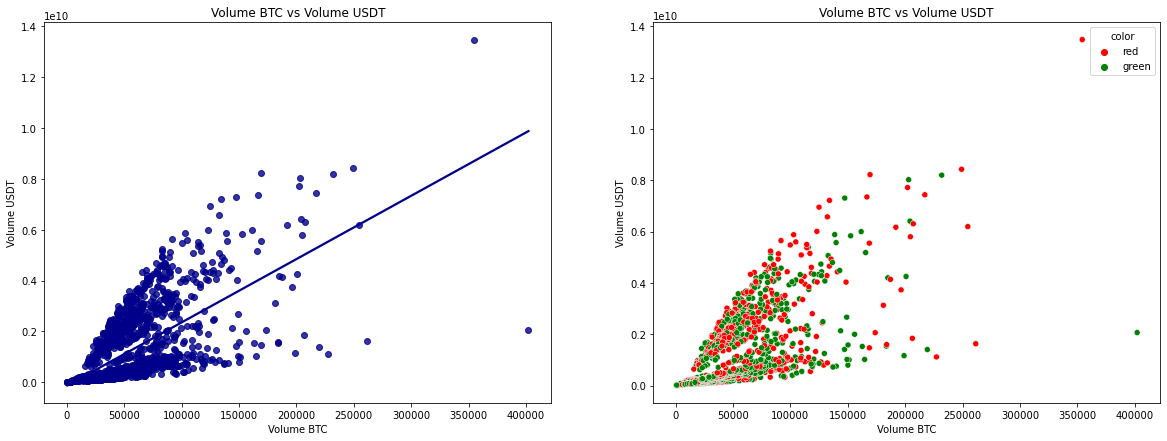

In [15]:
# Plot the scatterplot for volume BTC and Volume USDT

fig, ax =plt.subplots(ncols=2 , figsize=(20,7))
sns.regplot(data = df_volume, x='Volume BTC', y='Volume USDT', color='darkblue', ax=ax[0], ci=None).set_title('Volume BTC vs Volume USDT')
sns.scatterplot(data = df_volume, x='Volume BTC', y='Volume USDT', hue='color',  palette=['red', 'green'], ax=ax[1]).set_title('Volume BTC vs Volume USDT')
plt.show()

From the regplot and scatterplot above, we can see that the Volume BTC and Volume USDT have Linear Relationship. This mean that when Volume BTC increase, Volume USDT also increase. 

### 4. BTCUSDT Performance

##### 7-Days Performance :

In [16]:
# Create dataframe for 7 days data

seven_day = df_volume['2022-06-30' :'2022-07-6']

In [17]:
# Plot 7-Days Candlestick

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('BTCUSDT', 'Volume'), row_width=[0.3,0.8])

fig.add_trace(go.Candlestick(x=seven_day.index,
                open=seven_day['open'],
                high=seven_day['high'],
                low=seven_day['low'],
                close=seven_day['close'], name = 'Price', showlegend=False), row=1, col=1)

fig.add_trace(go.Bar(x=seven_day.index, y=seven_day['Volume BTC'], showlegend=False, opacity = 1, marker={'color': df_volume['color']}), row=2, col=1)

fig.update_layout(
    # title = 'JKSE historical price',
    xaxis_tickfont_size = 12,
    yaxis = dict(
        title = 'Price',
        titlefont_size=14,
        tickfont_size=12
    ),
    autosize=True,
)


fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(template='plotly_dark')
fig.show()

In [18]:
print('7-DAYs PERFORMANCE :', round((seven_day['close'][-1]-seven_day['open'][0])*100/seven_day['open'][0],2),'%')
print('Average Volume', round(sum(seven_day['Volume BTC']),2))

7-DAYs PERFORMANCE : 0.45 %
Average Volume 474623.93


Looking at the performance of BTCUSDT using recent 7-days data, we can see that the price movement can be considered stagnant and moving sideways since from 7-days candlestick, the price only move +0.45 %. 

##### 30-Days Performance :

In [19]:
# Create dataframe for 7 days data

monthly = df_volume['2022-06-7' :'2022-07-6']

In [20]:
# Plot 30-Days Candlestick

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('BTCUSDT', 'Volume'), row_width=[0.3,0.8])

fig.add_trace(go.Candlestick(x=monthly.index,
                open=monthly['open'],
                high=monthly['high'],
                low=monthly['low'],
                close=monthly['close'], name = 'Price', showlegend=False), row=1, col=1)

fig.add_trace(go.Bar(x=monthly.index, y=monthly['Volume BTC'], showlegend=False, opacity = 1, marker={'color': monthly['color']}), row=2, col=1)

fig.update_layout(
    # title = 'JKSE historical price',
    xaxis_tickfont_size = 12,
    yaxis = dict(
        title = 'Price',
        titlefont_size=14,
        tickfont_size=12
    ),
    autosize=True,
)


fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(template='plotly_dark')
fig.show()

In [21]:
print('30-DAYs PERFORMANCE :', round((monthly['close'][29]-monthly['open'][0])*100/monthly['open'][0],2),'%')
print('Average Volume', round(sum(monthly['Volume BTC']),2))

30-DAYs PERFORMANCE : -35.57 %
Average Volume 2864816.49


From 30-Days Performance, BTCUSD was moving downtrend since the price was down for -35.57% and the average of Volume was 2.864.816,49

##### YTD Performance :

In [22]:
# Create dataframe for 7 days data

ytd = df_volume['2022-01-1' :'2022-07-6']

In [23]:
# Plot YTD Candlestick

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1, subplot_titles=('BTCUSDT', 'Volume'), row_width=[0.3,0.8])

fig.add_trace(go.Candlestick(x=ytd.index,
                open=ytd['open'],
                high=ytd['high'],
                low=ytd['low'],
                close=ytd['close'], name = 'Price', showlegend=False), row=1, col=1)

fig.add_trace(go.Bar(x=ytd.index, y=ytd['Volume BTC'], showlegend=False, opacity = 1, marker={'color': ytd['color']}), row=2, col=1)

fig.update_layout(
    # title = 'JKSE historical price',
    xaxis_tickfont_size = 12,
    yaxis = dict(
        title = 'Price',
        titlefont_size=14,
        tickfont_size=12
    ),
    autosize=True,
)


fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(template='plotly_dark')
fig.show()

In [24]:
print('YTD-DAYs PERFORMANCE :', round((ytd['close'][-1]-ytd['open'][0])*100/ytd['open'][0],2),'%')
print('Average Volume', round(sum(ytd['Volume BTC']),2))

YTD-DAYs PERFORMANCE : -56.26 %
Average Volume 10886531.37


Since the beginning of the year, the BTC has been moving downtrend. The price has been decreasing for -56.26 % and the average trading volume was 10.886.531,37

### 5. Technical analysis with Moving Averages

What is Moving averages ?

```
According to CFI team, A moving average is a technical indicator that market analysts and investors may use to determine the direction of a trend. It sums up the data points of a financial security over a specific time period and divides the total by the number of data points to arrive at an average. 

Furthermore, a moving average also can be used to determine support and resistance. Hence, a moving average helps to indentify when to enter and exit from the market.
```

How to calculate moving average?

```
There are several types of moving average with different kind of formula. However, for this analysis, i will only use Simple Moving Average (SMA) that can be calculated using the formula as shown below :

for example, SMA 5 days :

            SMA(5 days)= (price day 1 + price day 2 + ... + price day 5)/ 5
```

source : https://corporatefinanceinstitute.com/resources/knowledge/other/moving-average/

In [25]:
# Moving average

df_volume['MA_20'] = df_volume['close'].rolling(window=20, min_periods=0).mean()
df_volume['MA_50'] = df_volume['close'].rolling(window=50, min_periods=0).mean()
df_volume['MA_200'] = df_volume['close'].rolling(window=200, min_periods=0).mean()

# MACD : 12 day EMA - 26-day ema
df_volume['26_ema'] = df_volume['close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
df_volume['12_ema'] = df_volume['close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
df_volume['MACD'] = df_volume['12_ema'] - df_volume['26_ema']
df_volume['signal'] = df_volume['MACD'].ewm(span=9,min_periods=0,adjust=True,ignore_na=False).mean()

In [26]:
# slice to 200 days

df_volume = df_volume[-200:]

In [27]:
# Plot the chart with technical indicators

fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.05, subplot_titles=('BTCUSDT', 'Volume', 'MACD'), row_width=[0.3,0.2,1])

fig.add_trace(go.Candlestick(x=df_volume.index,
                open=df_volume['open'],
                high=df_volume['high'],
                low=df_volume['low'],
                close=df_volume['close'], name = 'Price',increasing_line_color= 'lightseagreen', decreasing_line_color= 'tomato'), row=1, col=1)

fig.add_trace(go.Scatter(x=df_volume.index, y=df_volume['MA_20'], marker_color='green', name='MA20', opacity=0.5), row=1, col=1)
fig.add_trace(go.Scatter(x=df_volume.index, y=df_volume['MA_50'], marker_color='yellow', name='MA50', opacity=0.5), row=1, col=1)
fig.add_trace(go.Scatter(x=df_volume.index, y=df_volume['MA_200'], marker_color='red', name='MA200', opacity=0.5), row=1, col=1)
fig.add_trace(go.Bar(x=df_volume.index, y=df_volume['Volume BTC'], showlegend=False, marker={'color':df_volume['color']}), row=2, col=1)
vol_btc = go.Scatter(x=df_volume.index, y=df_volume['volbtc_MA_20'], mode='lines', marker_color= 'yellow', name='ma 20', showlegend=False)
fig.add_trace(vol_btc, row=2, col=1)


# plot MACD
fig.add_trace(go.Scatter(x=df_volume.index,
                        y=df_volume['MACD'], name='MACD', showlegend=False), row=3, col=1) 
fig.add_trace(go.Scatter(x=df_volume.index,
                        y=df_volume['signal'], name = 'Signal', showlegend=False), row=3, col=1) 
fig.add_hline(y=0 , line_color="red", opacity = 0.5, row=3, col=1)

fig.update_layout(
    xaxis_tickfont_size = 12,
    yaxis = dict(
        title = 'Price',
        titlefont_size=14,
        tickfont_size=12
    ),
    autosize=False,
    width=1000,
    height=800,
    # paper_bgcolor = 'Black'
)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(template='plotly_dark')
fig.update_layout(dragmode='pan')
fig.update_layout(showlegend=False)
fig.show()

1. In this analysis, 20-days MA can be used to define short-term trend. For Example if the price move above these 20-days MA, then from short-term perspective the trend is bullish. On the other hand, if the price move below 20-days MA, we can see it as short-term bearish.

2. 50-days moving average can be used to see whether the index is bullish or bearish from the medium-term perspective. Above 50-days moving average the trend is bullish while below 50 days MA is bearish.

3. 200-days MA to define longer preiod market trend. Above 100 MA or 200-days MA from long-term perspective can be cactegorize as bullish while if the opposite it is bearish. 


So, what is the current situation on BTCUSDT if we see it from technical perpesctive using moving averages as indicators?

```
From technical perspective:
 
The current price for BTCUSDT price is below its 20-days, 50-days, and 200-days MA. This is an indication that the price is in downtrend movement since it can be seen that from short-term, medium-term, and long-term all indicate that the current price for BTCUSDT is in bearish periods. 

The Moving average usually used by trader and investor as dynamic support and resistance and can be used to time when to entry an exit the market. For Example, for BTSUDT chart above, if the price move above 20-days MA (indicating short-term bullish), then we can used it as a timing to enter the market or buy BTC. Here, the 20-days MA will act as its dynamic support so once the price move below 20-days MA, the trader should exit the market since it broke down below the support area or 20-days MA.
```

## 5- Data preprocessing

### 1. Create new Dataset with only close column

For this project, we only need to use Close price column, because the purpose of time series LSTM sequence to sequence is to forecast the value in the future based on the previous value. 

In [28]:
# Creating new dataset

data = df.filter(['close'])
data

,close
date,
2017-08-17,4285.08
2017-08-18,4108.37
2017-08-19,4139.98
2017-08-20,4086.29
2017-08-21,4016.00
...,...
2022-07-02,19252.81
2022-07-03,19315.83
2022-07-04,20236.71


In [29]:
# Convert the dataframe to a numpy array

dataset = data.values
dataset

array([[ 4285.08],
       [ 4108.37],
       [ 4139.98],
       ...,
       [20236.71],
       [20175.83],
       [20213.78]])

### 2. Splitting the dataset

In [30]:
dataset.shape

(1786, 1)

- Train-set

In [31]:
# Get the number of rows to train the model on
train_data_len = int(np.ceil( len(dataset) * .80 ))

train_data_len

1429

In [32]:
trainset = dataset[0:int(train_data_len), :]
trainset.shape

(1429, 1)

In [33]:
trainset

array([[ 4285.08],
       [ 4108.37],
       [ 4139.98],
       ...,
       [33086.63],
       [32729.77],
       [32820.02]])

- Test-set

In [34]:
testset = dataset[train_data_len:,:]
testset.shape

(357, 1)

In [35]:
print('trainset and test set shape :')
print(trainset.shape, testset.shape)

trainset and test set shape :
(1429, 1) (357, 1)


### 3. Feature scaling

Normalizing the dataset by rescalling the trainset and test set using MinMaxScaler. This process will rescale the initial value from both set into a new value with the range of 0 and 1. The purpose of this process is so that it is easier for the model to learn the data.

In [36]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(trainset)

train_scaled = scaler.transform(trainset)
test_scaled = scaler.transform(testset)

scalling result :

In [37]:
train_scaled[0:5]

array([[0.0181509 ],
       [0.01522456],
       [0.01574803],
       [0.01485891],
       [0.0136949 ]])

In [38]:
test_scaled[0:5]

array([[0.47512651],
       [0.46691053],
       [0.46916602],
       [0.47344665],
       [0.45789817]])

### 4. Splitting the trainset and testset into

The trainset then divided into X_train and y_train, while the test set divided into X_test and y_test:

1. X_train, y_train

In [39]:
# Split the data into x_train and y_train data sets
X_train = []
y_train = []

for i in range(30, len(train_scaled)):  # 30 is total fitur we take from sample
    X_train.append(train_scaled[i-30:i, 0])
    y_train.append(train_scaled[i, 0])    

In [40]:
print(X_train[:2])
print(y_train[:2])

[array([0.0181509 , 0.01522456, 0.01574803, 0.01485891, 0.0136949 ,
       0.01409234, 0.01531796, 0.01866311, 0.01807804, 0.01901799,
       0.01856375, 0.01983358, 0.02315869, 0.02262313, 0.02543422,
       0.02725616, 0.02124864, 0.02186037, 0.01508777, 0.01949873,
       0.02369341, 0.02488309, 0.01811314, 0.01771587, 0.01558888,
       0.01688223, 0.01614116, 0.012514  , 0.        , 0.0084619 ]), array([0.01522456, 0.01574803, 0.01485891, 0.0136949 , 0.01409234,
       0.01531796, 0.01866311, 0.01807804, 0.01901799, 0.01856375,
       0.01983358, 0.02315869, 0.02262313, 0.02543422, 0.02725616,
       0.02124864, 0.02186037, 0.01508777, 0.01949873, 0.02369341,
       0.02488309, 0.01811314, 0.01771587, 0.01558888, 0.01688223,
       0.01614116, 0.012514  , 0.        , 0.0084619 , 0.00870947])]
[0.008709471966837329, 0.008461732342507314]


2. X_test, y_test

In [41]:
# Split the data into x_train and y_train data sets
X_test = []
y_test = []

for i in range(30, len(test_scaled)):
    X_test.append(test_scaled[i-30:i, 0])
    y_test.append(test_scaled[i, 0])  

In [42]:
print(X_test[:2])
print(y_test[:2])

[array([0.47512651, 0.46691053, 0.46916602, 0.47344665, 0.45789817,
       0.44052162, 0.47950683, 0.48188023, 0.50417448, 0.51450883,
       0.53310388, 0.56384909, 0.60061706, 0.60991873, 0.60986772,
       0.6461326 , 0.63380291, 0.60703528, 0.59548259, 0.57990332,
       0.60501063, 0.62387726, 0.65657376, 0.68531669, 0.67243009,
       0.71315196, 0.702083  , 0.70085772, 0.68244285, 0.73876387]), array([0.46691053, 0.46916602, 0.47344665, 0.45789817, 0.44052162,
       0.47950683, 0.48188023, 0.50417448, 0.51450883, 0.53310388,
       0.56384909, 0.60061706, 0.60991873, 0.60986772, 0.6461326 ,
       0.63380291, 0.60703528, 0.59548259, 0.57990332, 0.60501063,
       0.62387726, 0.65657376, 0.68531669, 0.67243009, 0.71315196,
       0.702083  , 0.70085772, 0.68244285, 0.73876387, 0.72665029])]
[0.726650292004866, 0.7250822127917771]


### 5. Convert the dataset to numpy arrays

In [43]:
# Convert the x_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

print('X_train :', X_train.shape)
print('y_train :',y_train.shape)
print()
print('X_test :',X_test.shape)
print('y_test :',y_test.shape)

X_train : (1399, 30)
y_train : (1399,)

X_test : (327, 30)
y_test : (327,)


### 6. Reshape the data

In [44]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_train.shape)
print(X_test.shape)

(1399, 30, 1)
(327, 30, 1)


## 6- Model Training and Model Validation

**LSTM**

LSTM is one of the Recurrent Neural Network algorithm which is commonly used for processing and forecasting time-series data. The LSTM model analyze the historcial price patterns and use it to predict the futures values of a time-series problem.

### Model Definition

In [45]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))

model.add(Dense(28))
model.add(Dropout(0.15))
model.add(Dense(1))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 28)                924       
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
Total params: 30,265
Trainable params: 30,265
Non-trainable params: 0
_________________________________________________________________


Using tensorflow callback so that when training the model, the best model from epochs can be automatically saved. 
1. First, using early stopping to monitor 'val_loss' in this case with the patience of 5 so the training will stop after the val_loss drop 5 times from the best value.
2. ModelCheckpoint, to save the model with the best 'val_loss' in this case. Model willbe saved as 'model_best.hdf5' format.

### Model Training

In [47]:
# callbacks

callbacks= [
    EarlyStopping(monitor= 'val_loss', mode= 'min', patience= 5, verbose=1),
    ModelCheckpoint('model_best.hdf5', monitor='val_loss', save_best_only= True)
    #ReduceLROnPlateau

]

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

# Compile
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam') # Paling modern , validation_data= (X_test, y_test) ,

# Model Training
epochs=100
history= model.fit(X_train,y_train, batch_size= 32, epochs=epochs,
                   validation_data= (X_test, y_test), 
                          callbacks= callbacks, verbose=1)

Epoch 1/100
44/44 [==============================] - 12s 90ms/step - loss: 0.0073 - val_loss: 0.0038
Epoch 2/100
44/44 [==============================] - 2s 47ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 3/100
44/44 [==============================] - 2s 46ms/step - loss: 0.0022 - val_loss: 0.0068
Epoch 4/100
44/44 [==============================] - 2s 49ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 5/100
44/44 [==============================] - 2s 45ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 6/100
44/44 [==============================] - 2s 49ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 7/100
44/44 [==============================] - 2s 42ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 8/100
44/44 [==============================] - 2s 51ms/step - loss: 0.0017 - val_loss: 0.0022
Epoch 9/100
44/44 [==============================] - 2s 48ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 10/100
44/44 [==============================] - 2s 38ms/step - loss: 0.0014 - val_loss: 0.002

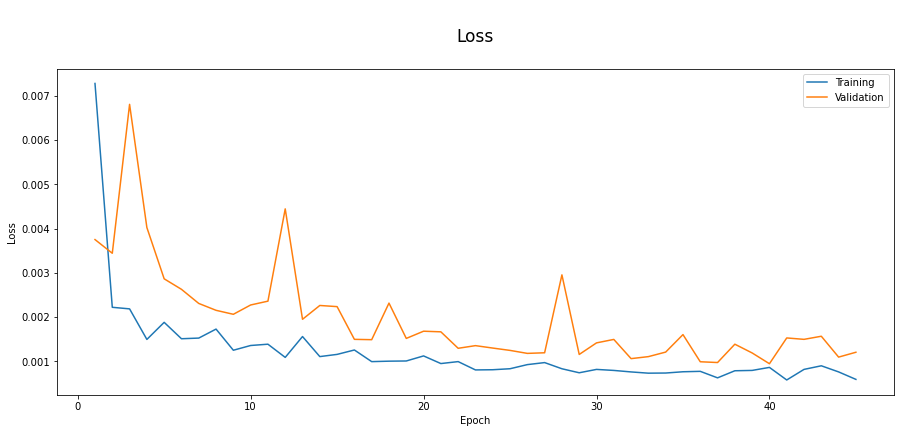

In [49]:
# Plot Sequential API result
epochs=len(history.history['loss'])

plt.figure(figsize=(15,6))
plt.plot(range(1,epochs+1),history.history['loss'],label='Training')
plt.plot(range(1,epochs+1),history.history['val_loss'],label='Validation')
plt.title('\nLoss\n', fontsize=17)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

### Model Evaluation

In [50]:
# Get the models predicted price values 
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 2s 12ms/step


In [54]:
# Plot the data

train = data[:train_data_len]
valid = data[train_data_len+30:]
valid['forecast'] = predictions

# take a look at the data :

valid

,close,forecast
date,,
2021-08-14,47068.51,44929.324219
2021-08-15,46973.82,45669.828125
2021-08-16,45901.29,45952.769531
2021-08-17,44695.95,45407.179688
2021-08-18,44705.29,44264.968750
...,...,...
2022-07-02,19252.81,19935.792969
2022-07-03,19315.83,19644.710938
2022-07-04,20236.71,19522.722656


##### Evaluation metrices RMSE, MSE

Root Mean Square Error (RMSE), Mean Square Error (MSE) are a standard way to measure the error of a model in predicting quantitative data.

In [61]:
mse =  metrics.mean_squared_error(valid['close'], valid['forecast'])
rmse = (metrics.mean_squared_error(valid['close'], valid['forecast']))**0.5

print("Test data RMSE: ", rmse)
print("Test data MSE: ", mse)

print(f'The root mean squared error is {rmse:.2f}. This means that the average deviation between the predicted price and the actual price is around ${rmse:.2f}')

Test data RMSE:  2098.4495804485523
Test data MSE:  4403490.641684705
The root mean squared error is 2098.45. This means that the average deviation between the predicted price and the actual price is around $2098.45


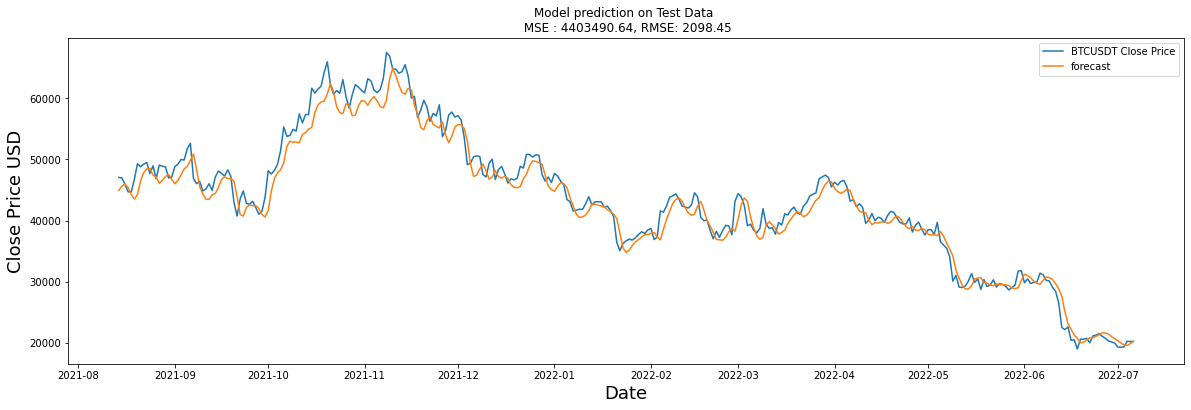

In [65]:
# Visualize the data
plt.figure(figsize=(20,6))
plt.title(f'Model prediction on Test Data \n MSE : {mse:.2f}, RMSE: {rmse:.2f}')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)

# plt.plot(train['Close'])
plt.plot(valid[['close', 'forecast']])
plt.legend(['BTCUSDT Close Price', 'forecast'], loc='upper right')
plt.show()

Forecasting the next day price close:

In [66]:
X_test.shape

(327, 30, 1)

In [67]:
hist60days = X_test[-1].reshape(1, 30, 1)
forecast = model.predict(hist60days)
forecast = scaler.inverse_transform(forecast)
forecast

1/1 [==============================] - 0s 33ms/step


array([[20190.22]], dtype=float32)

In [68]:
date = pd.to_datetime('today').normalize()
date

Timestamp('2022-07-12 00:00:00')

In [76]:
# initialize list of lists
data = [[date, forecast[0][0]]]
 
# Create the pandas DataFrame
x = pd.DataFrame(data, columns=['date', 'pred'])
x.set_index(['date'],inplace=True)

# print dataframe.
x

,pred
date,
2022-07-12,20190.220703


In [85]:
fig = make_subplots(specs=[[{"secondary_y" : True}]])


fig.add_trace(go.Scatter(x=valid.index,
                y=valid['close'], name='JKSE price'),
                secondary_y = True) 
fig.update_traces(line_color='black', line_width=3)

fig.add_trace(go.Scatter(x=x.index,
                y=x['pred'], name='forecast'),
                secondary_y = True)
# fig.update_traces(line_color='Black', line_width=3)
fig.update_layout(title_text=f'BTCUSDT next day forecast Price = ${forecast[0][0]:.2f}', title_x=0.5)

fig.show()

## 7- Model Saving

In [86]:
prep_pipeline = make_pipeline(MinMaxScaler(feature_range=(0,1)))

prep_pipeline.fit(trainset)

Pipeline(steps=[('minmaxscaler', MinMaxScaler())])

In [87]:
# save  pipeline

with open("prep_pipeline.pkl", "wb") as f:
  pickle.dump(prep_pipeline, f)

The model LSTM in this project is automatically saved by using a callback method where during the model training only the best model is saved. The best model is selected according to validation loss value, the lower the value the better the model performance.

The saved model can be loaded as :

In [88]:
pickled_model = pickle.load(open('prep_pipeline.pkl', 'rb'))

In [89]:
saved_model = tf.keras.models.load_model('model_best.hdf5')

In [90]:
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 28)                924       
                                                                 
 dropout (Dropout)           (None, 28)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
Total params: 30,265
Trainable params: 30,265
Non-trainable params: 0
_________________________________________________________________


## 8- Model Inference

For model inference, it is better if we use real data from yahoo finance :

In [92]:
get_data = yf.Ticker("BTC-USD")

data_inference = pd.DataFrame(get_data.history(period="30d"), columns=['Close'])
data_inference[-5:]

,Close
Date,
2022-07-08,21731.117188
2022-07-09,21592.207031
2022-07-10,20860.449219
2022-07-11,19970.556641
2022-07-12,20034.494141


In [93]:
data_inf = pickled_model.transform(data_inference)

X_next = data_inf.reshape(1, 30, 1)

In [94]:
next_day = saved_model.predict(X_next)
next_day = pickled_model.inverse_transform(next_day)
next_day

1/1 [==============================] - 2s 2s/step


array([[20518.602]], dtype=float32)

In [95]:
date = datetime.datetime.today() + datetime.timedelta(days=1)
date

datetime.datetime(2022, 7, 13, 12, 45, 39, 658299)

In [96]:
# initialize list of lists
data = [[date, next_day[0][0]]]
 
# Create the pandas DataFrame
y = pd.DataFrame(data, columns=['date', 'pred'])
y.set_index(['date'],inplace=True)

# print dataframe.
y

,pred
date,
2022-07-13 12:45:39.658299,20518.601562


In [98]:
# if we plot it :

fig = make_subplots(specs=[[{"secondary_y" : True}]])

fig.add_trace(go.Scatter(x=data_inference.index,
                y=data_inference['Close'], name='JKSE price'),
                secondary_y = True) 
fig.update_traces(line_color='black', line_width=3)

fig.add_trace(go.Scatter(x=y.index,
                y=y['pred'], name='forecast'),
                secondary_y = True)
# fig.update_traces(line_color='Black', line_width=3)
fig.update_layout(title_text=f'BTCUSDT next day forecast Price = ${next_day[0][0]:.2f}', title_x=0.5)

fig.show()

## 9- Conclusion

For this project , we decided to train a model using LSTM algorithm. The reason for this is because LSTM is commonly used for processing and forecasting time-series data. LSTM use a sequence to sequence algorithm where to forecast the next day value the algorithm will use the historical data or the previous value. For our model, to predict the next day Index price it will need to use 60 days previous value or 3 month worth of market open data. 

Our Model trained using sequential API method and use 3 LSTM layers with initializer to handle gradient vanishing. Also, we also use 1 Dense layer combine with 1 Dropout and 1 output layer.

For the model evaluation, we use Mean Squared Error (MSE). This metrics value tell us about the average squared difference between the estimated values and the actual value. the lower the value the better. As for our model, the MSE value is around 0.0002 which is good. Which mean that the different between the actual price and forecast price will be small and the model shoul be able to predict well with small error.


However, although the model can perform well. We suggest that to always use the prediction result as second or third opinion only. Since forecasting and predicting the time-series is always a hard task to do.

To conclude, Although from the 20 years data perpective we can see that the Index price going higher and higher, there might be a time where the price going to drop as a result of overal world situation or a country situation. So, for all of the traders and investors, they have to always keep themselves up-to-date about the current situation or even to be able to predict what comes next.